In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# UPLOADING THE DATA 

In [2]:
train_df=pd.read_csv("/kaggle/input/default/train_dataset_final1.csv")
val_df =pd.read_csv("/kaggle/input/default/validate_dataset_final.csv")

In [3]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [4]:
print("The number of Features in  train dataset :",train_df.shape[1])
print("The number of Rows in Train dataset :",train_df.shape[0])
print("The number of Features in  validation dataset :",val_df.shape[1])
print("The number of Rows in validation dataset :",val_df.shape[0])

The number of Features in  train dataset : 27
The number of Rows in Train dataset : 25247
The number of Features in  validation dataset : 26
The number of Rows in validation dataset : 5016


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [6]:
val_df.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [7]:
train_df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

# : Since the age column had missing values, we filled them using the mediam.

In [8]:
median_age = train_df['age'].median()
train_df['age'].fillna(median_age, inplace=True)
val_df['age'].fillna(median_age, inplace=True)

In [9]:
train_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


# UNIVARIATE ANALYSIS

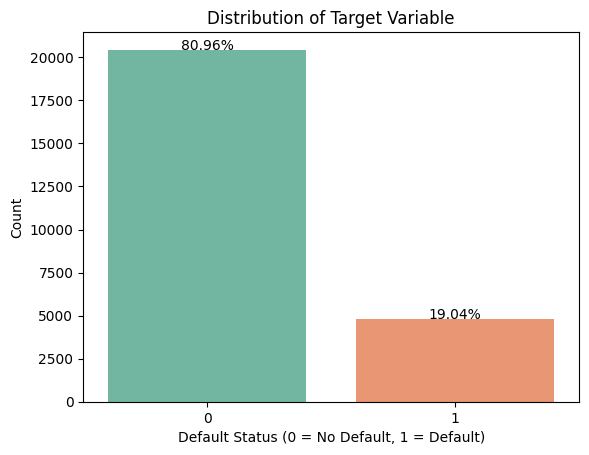

In [10]:
sns.countplot(x='next_month_default', data=train_df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Count')

total = len(train_df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, f'{100 * height / total:.2f}%', ha='center')

plt.show()

# It can be seen that the data is imbalanced, and the minority class (defaulters) represents a significantly smaller portion of the dataset.This imbalance can negatively affect model performance, especially for recall and F2 score, so we applied techniques like resampling ng to address it further 

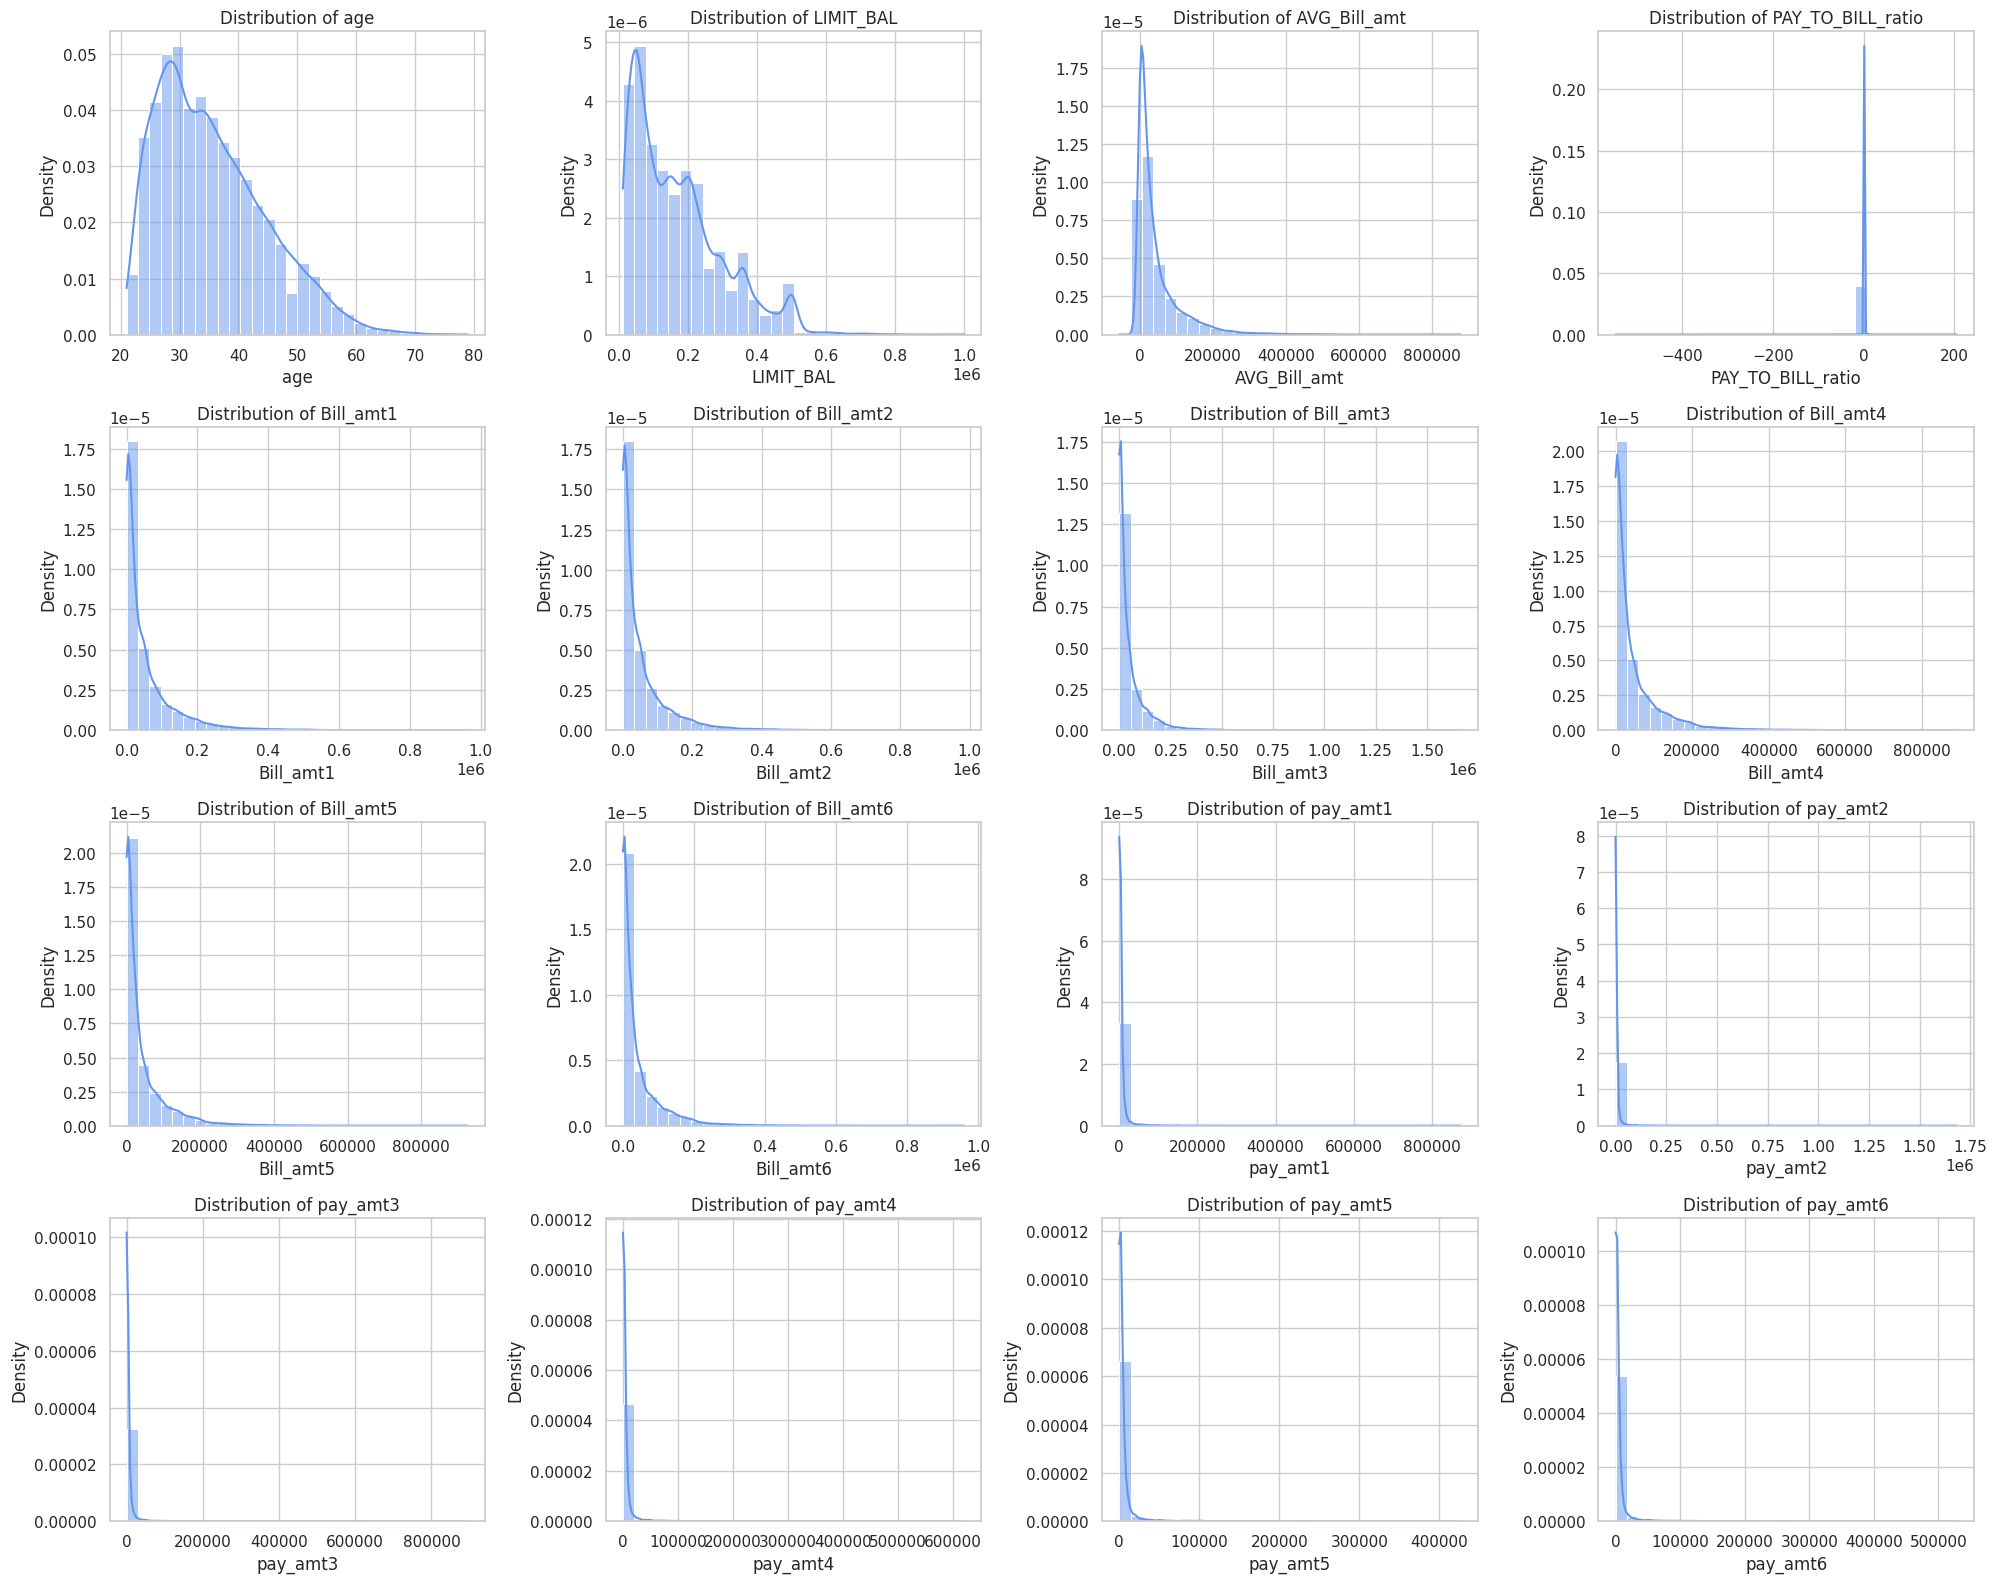

In [11]:
sns.set(style="whitegrid")

numerical_cols = [
    'age', 'LIMIT_BAL', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'
]

num_cols = 4
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

# Plot each numerical column with KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(train_df[col], kde=True, bins=30, color='cornflowerblue', ax=axes[i], stat='density')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# BIVARITE ANALAYSIS


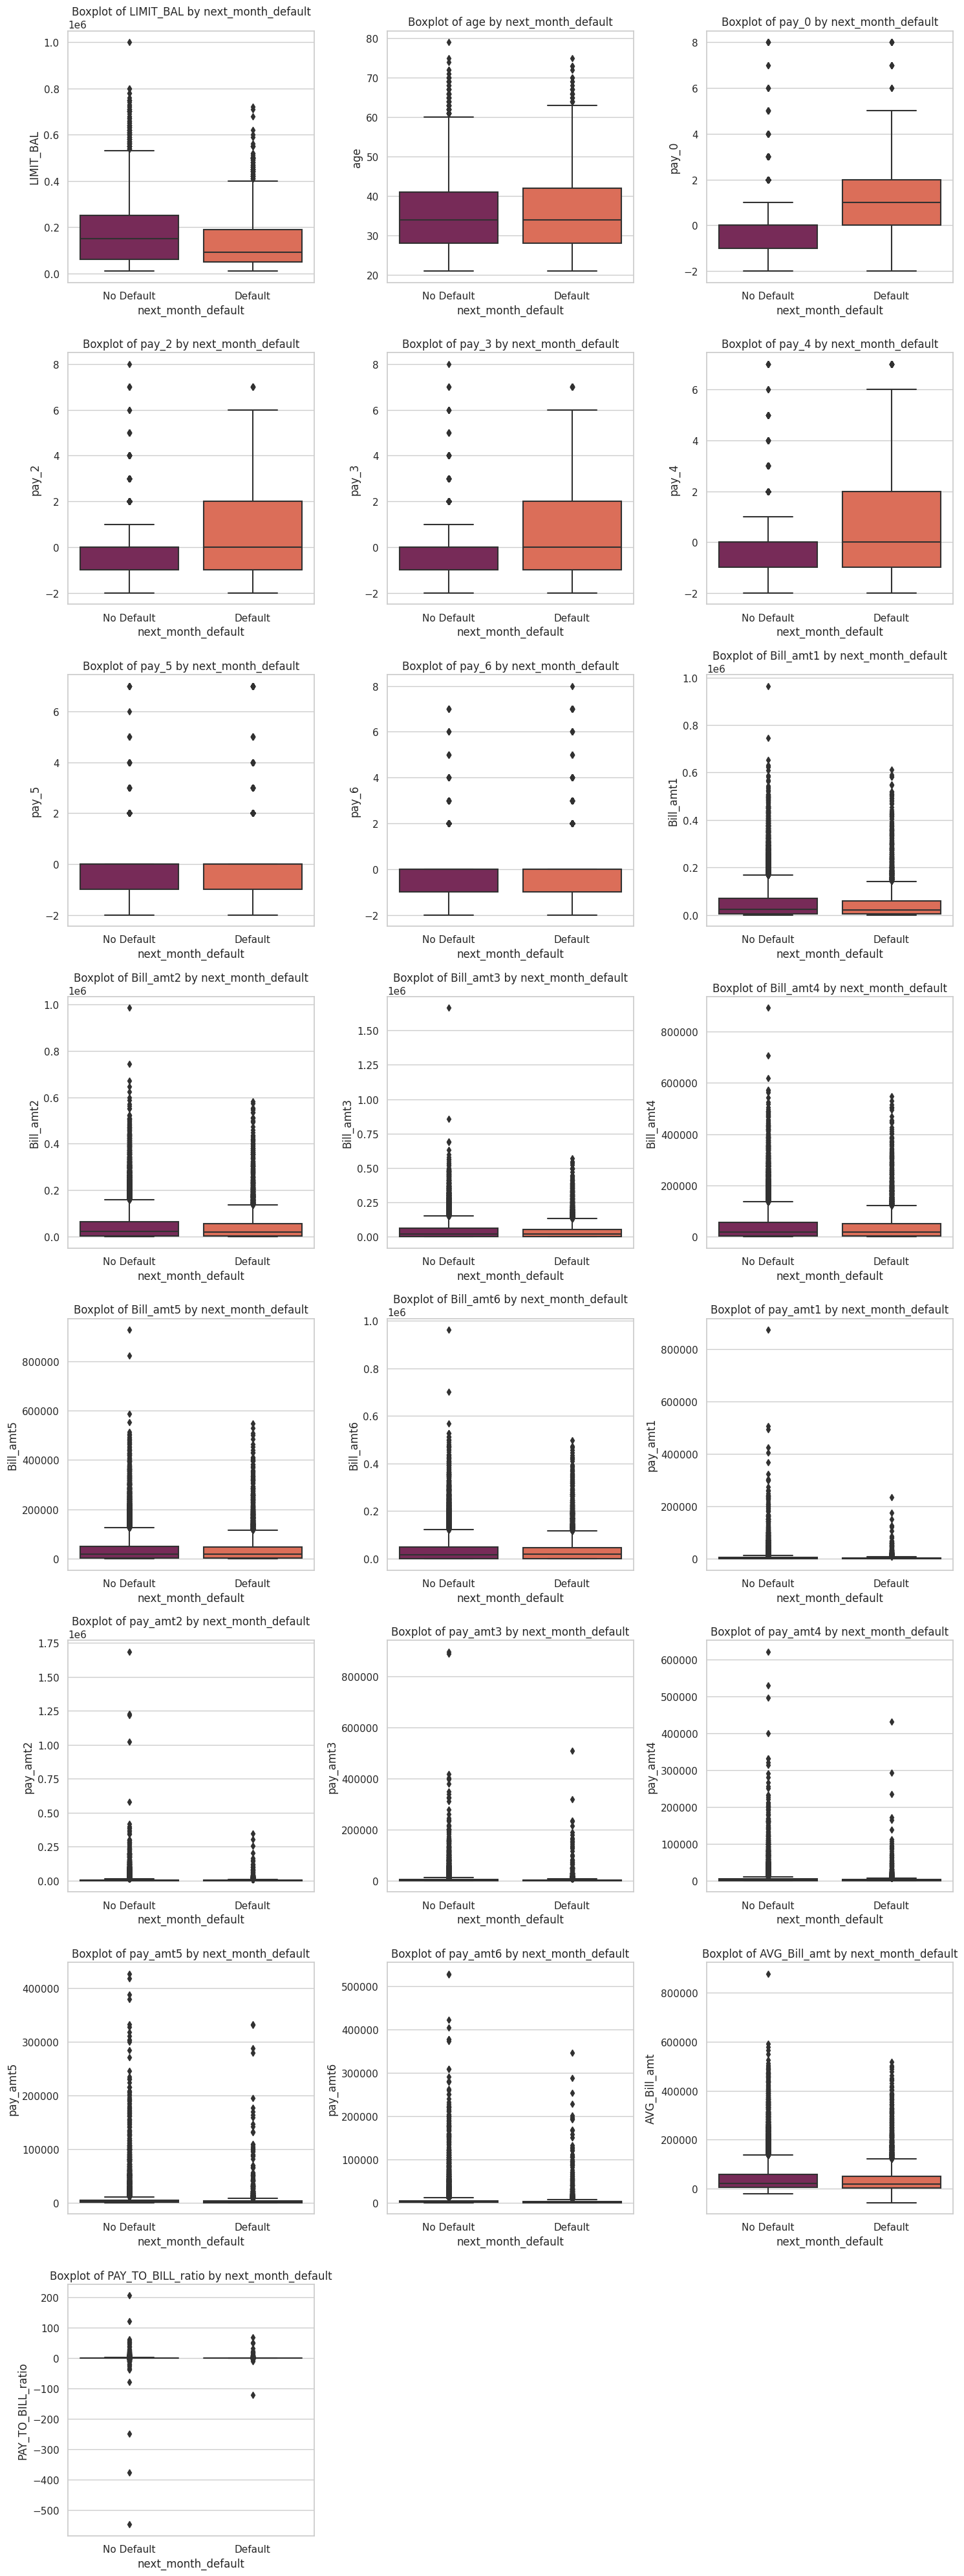

In [12]:
# Boxplot for all the given numerical features
def plot_box_plots(df, features):
    n = len(features)
    cols = 3
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x='next_month_default', y=col, data=df, palette="rocket")
        plt.title(f'Boxplot of {col} by next_month_default')
        plt.xticks([0, 1], ['No Default', 'Default'])
    
    plt.tight_layout()
    plt.show()

features = ["LIMIT_BAL", "age", "pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", 
            "Bill_amt1", "Bill_amt2", "Bill_amt3", "Bill_amt4", "Bill_amt5", "Bill_amt6", 
            "pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6",
            "AVG_Bill_amt", "PAY_TO_BILL_ratio"]

plot_box_plots(train_df, features)

# from the boxplot and histogram we can see that the r PAY_TO_BILL_ratio clearly shows extreme negative outliers, especially in the “No Default” group.

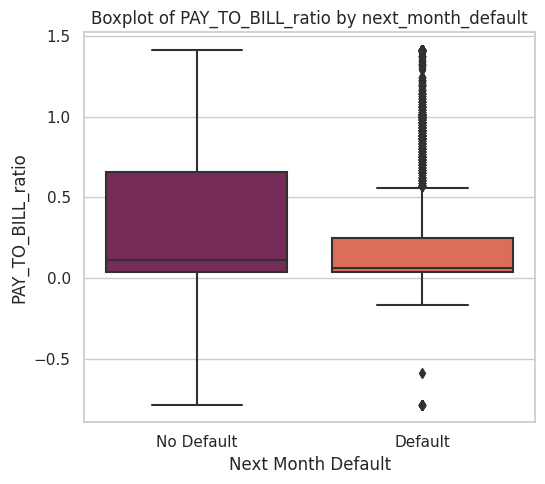

In [13]:
# Removing the outliers from PAY_TO_BILL_ratio
Q1 = train_df['PAY_TO_BILL_ratio'].quantile(0.25)
Q3 = train_df['PAY_TO_BILL_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


train_df['PAY_TO_BILL_ratio'] = train_df['PAY_TO_BILL_ratio'].clip(lower=lower_bound, upper=upper_bound)
val_df['PAY_TO_BILL_ratio'] = val_df['PAY_TO_BILL_ratio'].clip(lower=lower_bound, upper=upper_bound)


 # Boxplot of PAY_TO_BILL_ratio After Outlier Capping
def plot_box_plots(df, features):
    n = len(features)
    cols = 3
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x='next_month_default', y=col, data=df, palette="rocket")
        plt.title(f'Boxplot of {col} by next_month_default')
        plt.xticks([0, 1], ['No Default', 'Default'])
        plt.xlabel('Next Month Default')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

plot_box_plots(train_df, ['PAY_TO_BILL_ratio'])



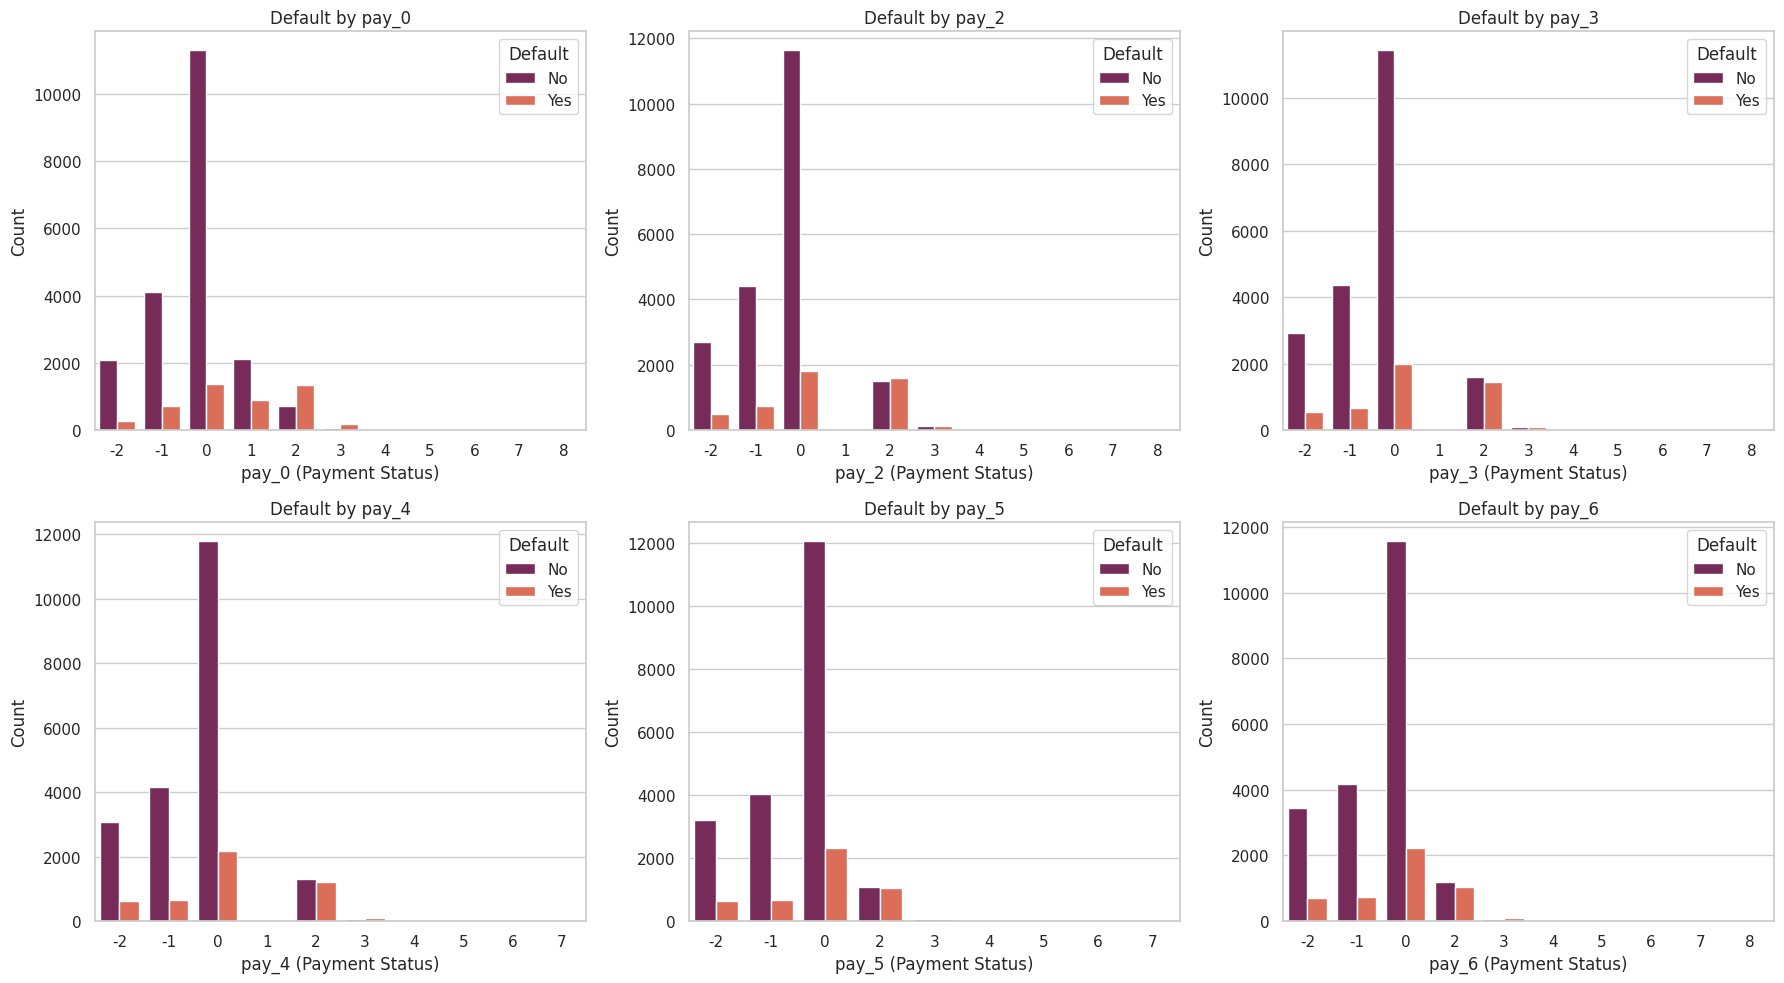

In [14]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(pay_cols):
    sns.countplot(x=col, hue='next_month_default', data=train_df, ax=axes[i],palette = 'rocket')
    axes[i].set_title(f'Default by {col}')
    axes[i].set_xlabel(f'{col} (Payment Status)')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Default', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

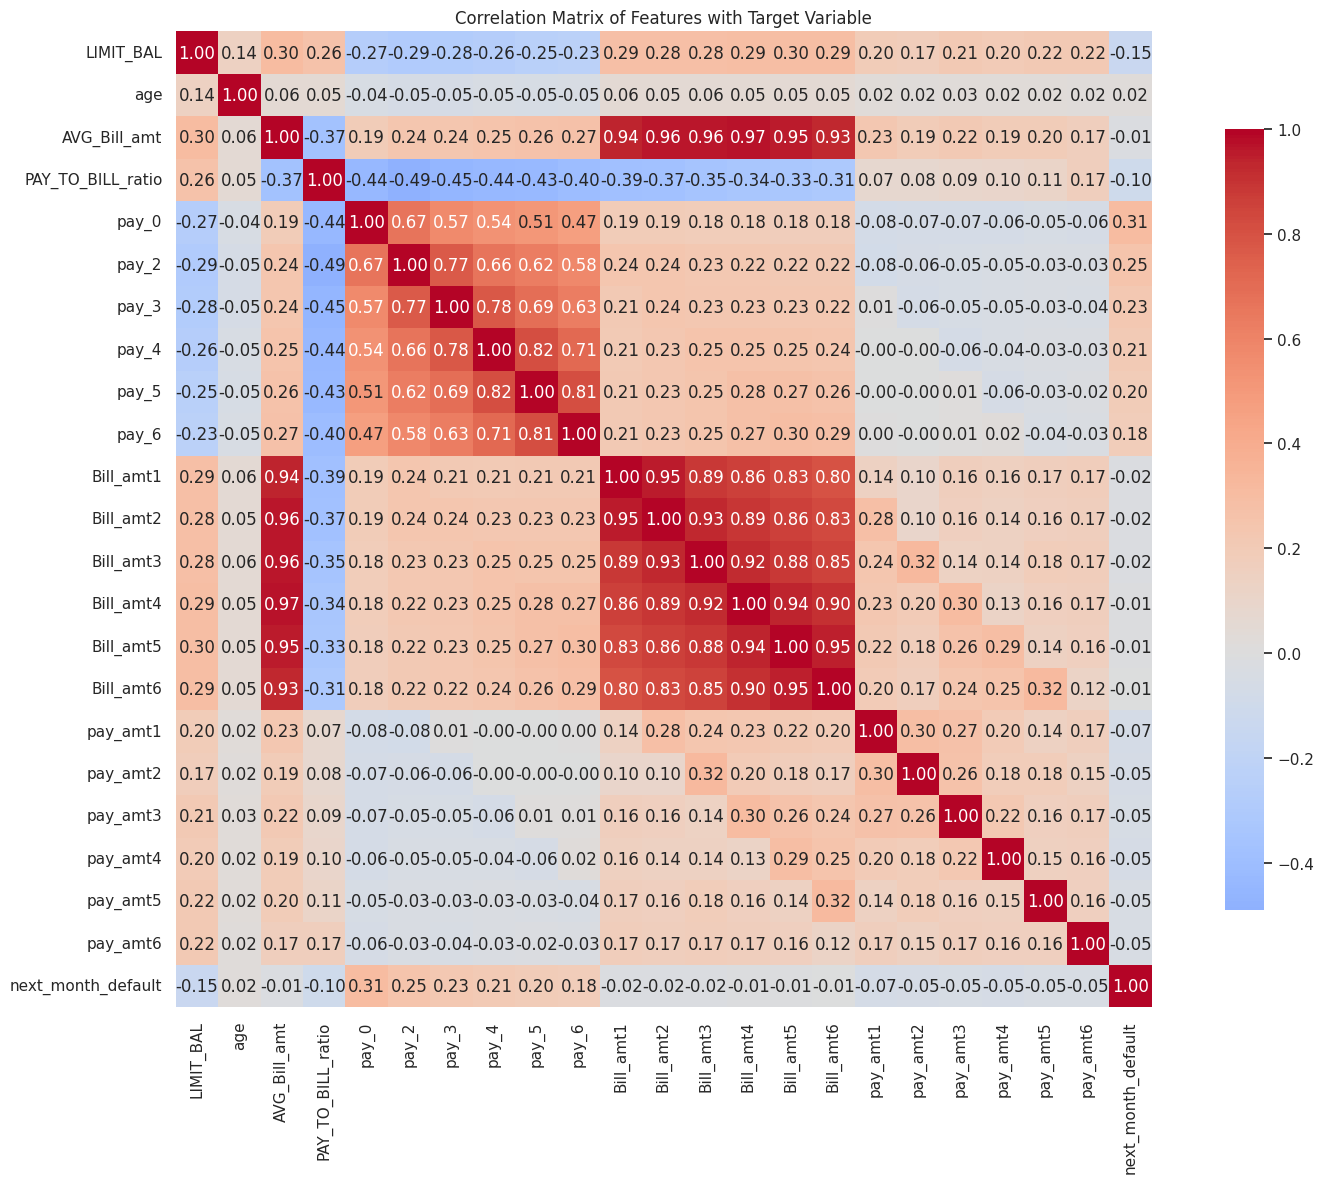

In [15]:
corr_features = [
    'LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'next_month_default'
]

# Compute correlation matrix
corr_matrix = train_df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={'shrink': 0.8}, square=True)
plt.title('Correlation Matrix of Features with Target Variable')
plt.tight_layout()
plt.show()

# The heatmap confirms that delinquency history (especially pay_0) is the most significant indicator of default, while credit usage behavior (via ratios or limits) also plays a key role.

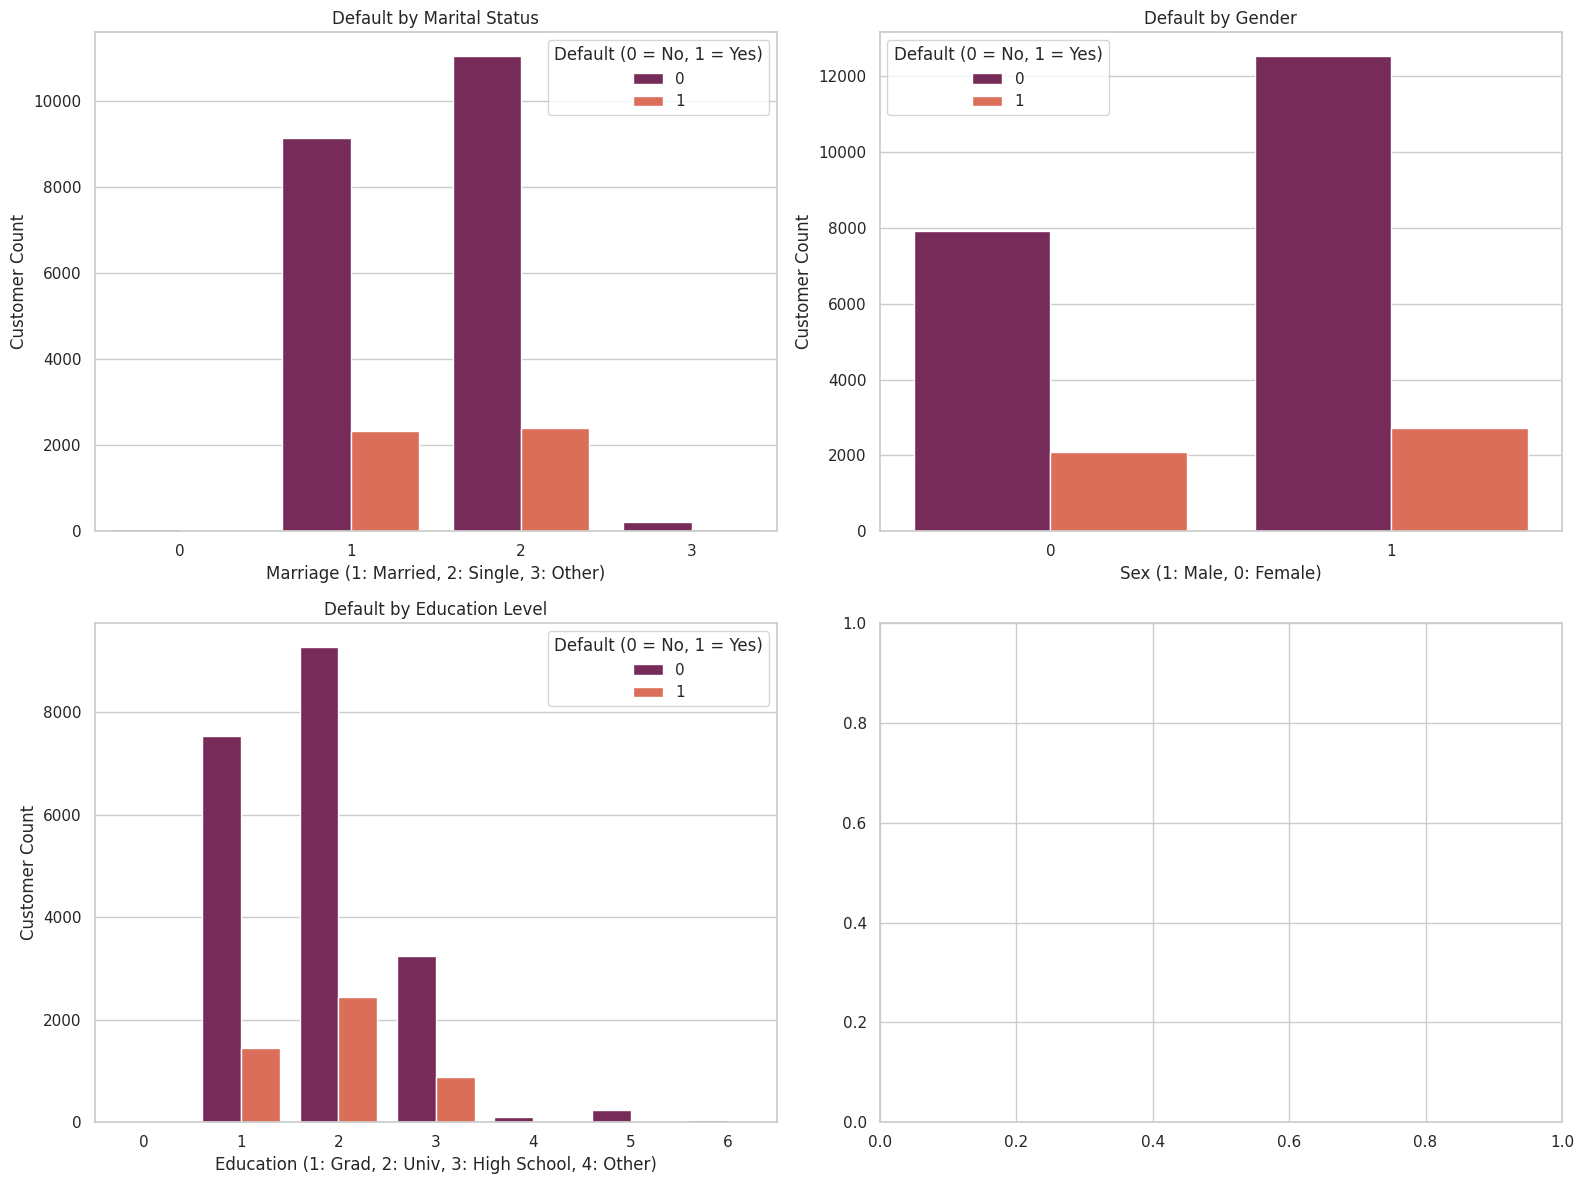

In [16]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Marital Status
sns.countplot(x='marriage', hue='next_month_default', data=train_df, ax=axes[0, 0], palette='rocket')
axes[0, 0].set_title('Default by Marital Status')
axes[0, 0].set_xlabel('Marriage (1: Married, 2: Single, 3: Other)')
axes[0, 0].set_ylabel('Customer Count')
axes[0, 0].legend(title='Default (0 = No, 1 = Yes)')

# 2. Gender
sns.countplot(x='sex', hue='next_month_default', data=train_df, ax=axes[0, 1], palette='rocket')
axes[0, 1].set_title('Default by Gender')
axes[0, 1].set_xlabel('Sex (1: Male, 0: Female)')
axes[0, 1].set_ylabel('Customer Count')
axes[0, 1].legend(title='Default (0 = No, 1 = Yes)')

# 3. Education
sns.countplot(x='education', hue='next_month_default', data=train_df, ax=axes[1, 0], palette='rocket')
axes[1, 0].set_title('Default by Education Level')
axes[1, 0].set_xlabel('Education (1: Grad, 2: Univ, 3: High School, 4: Other)')
axes[1, 0].set_ylabel('Customer Count')
axes[1, 0].legend(title='Default (0 = No, 1 = Yes)')


plt.tight_layout()
plt.show()


#  finding the relationship between education,sex and marriage

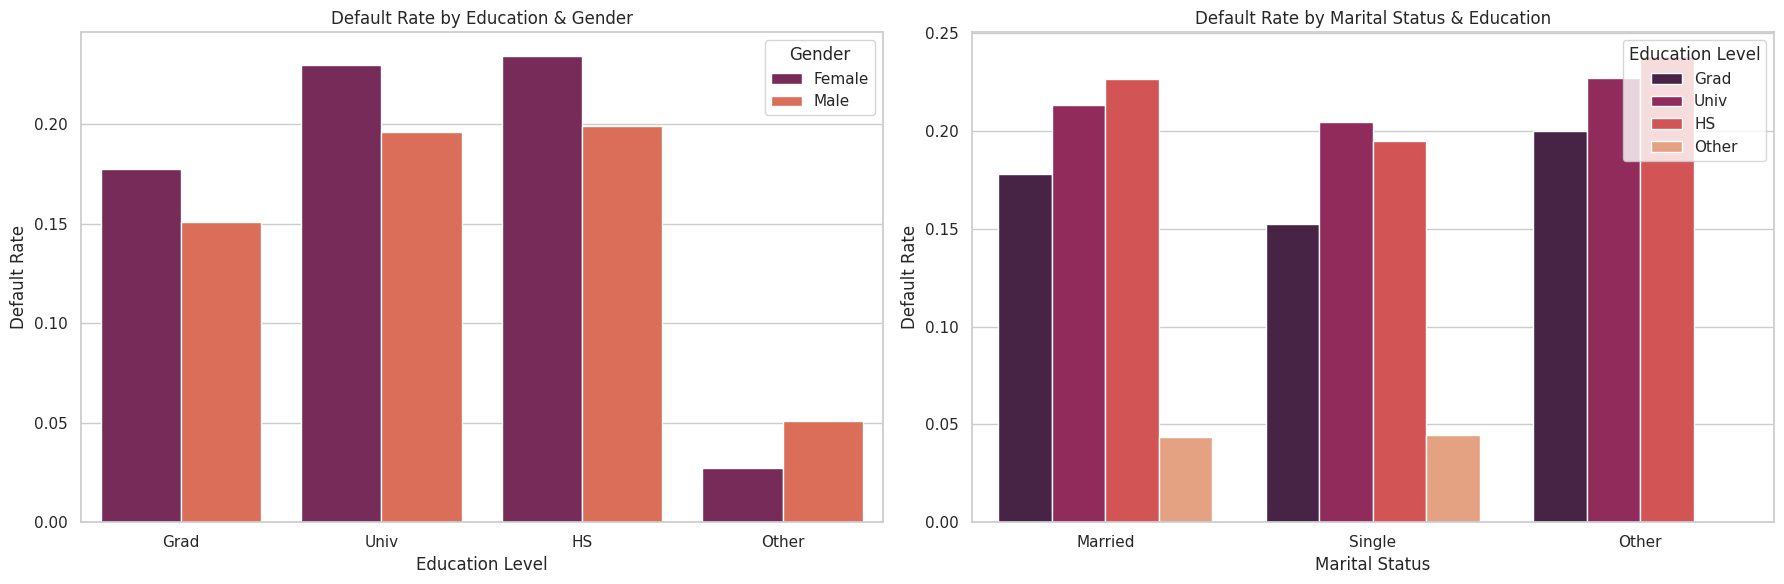

In [17]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Default Rate by Education & Sex
edu_sex_rate = train_df.groupby(['education', 'sex'])['next_month_default'].mean().reset_index()

edu_map = {1: 'Grad', 2: 'Univ', 3: 'HS', 4: 'Other'}
sex_map = {0: 'Female', 1: 'Male'}

edu_sex_rate['education'] = edu_sex_rate['education'].map(edu_map)
edu_sex_rate['sex'] = edu_sex_rate['sex'].map(sex_map)

sns.barplot(
    x='education',
    y='next_month_default',
    hue='sex',
    data=edu_sex_rate,
    palette='rocket',
    ax=axes[0]
)

axes[0].set_title('Default Rate by Education & Gender')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Default Rate')
axes[0].legend(title='Gender')

# 2.Marriage and Education
marriage_edu_rate = train_df.groupby(['marriage', 'education'])['next_month_default'].mean().reset_index()

edu_map = {1: 'Grad', 2: 'Univ', 3: 'HS', 4: 'Other'}
marriage_map = {1: 'Married', 2: 'Single', 3: 'Other'}

marriage_edu_rate['education'] = marriage_edu_rate['education'].map(edu_map)
marriage_edu_rate['marriage'] = marriage_edu_rate['marriage'].map(marriage_map)

sns.barplot(
    x='marriage',
    y='next_month_default',
    hue='education',
    data=marriage_edu_rate,
    palette='rocket',
    ax=axes[1]
)

axes[1].set_title('Default Rate by Marital Status & Education')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Default Rate')
axes[1].legend(title='Education Level')

plt.tight_layout()
plt.show()



# Higher default rates were observed among individuals with High School or University education, especially females.
# Married and "Other" marital status groups with lower education levels showed elevated risk.
# Single graduates had the lowest default rates, indicating stronger financial responsibility


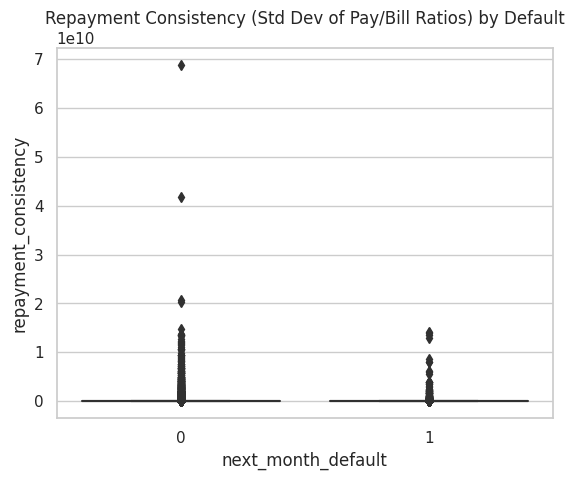

In [18]:
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# Calculate monthly payment-to-bill ratio (add small epsilon to avoid division by zero)
for i in range(6):
    train_df[f'repay_ratio_{i+1}'] = train_df[pay_amt_cols[i]] / (train_df[bill_cols[i]] + 1e-5)

# Standard deviation of repayment ratios: low std means consistent payments
train_df['repayment_consistency'] = train_df[[f'repay_ratio_{i+1}' for i in range(6)]].std(axis=1)

sns.boxplot(x='next_month_default', y='repayment_consistency', data=train_df, palette='rocket')
plt.title("Repayment Consistency (Std Dev of Pay/Bill Ratios) by Default")
plt.show()

# Customers who defaulted (1) showed higher variability in repayment consistency (i.e., standard deviation of payment-to-bill ratios
# Most non-defaulters maintained stable repayment patterns.

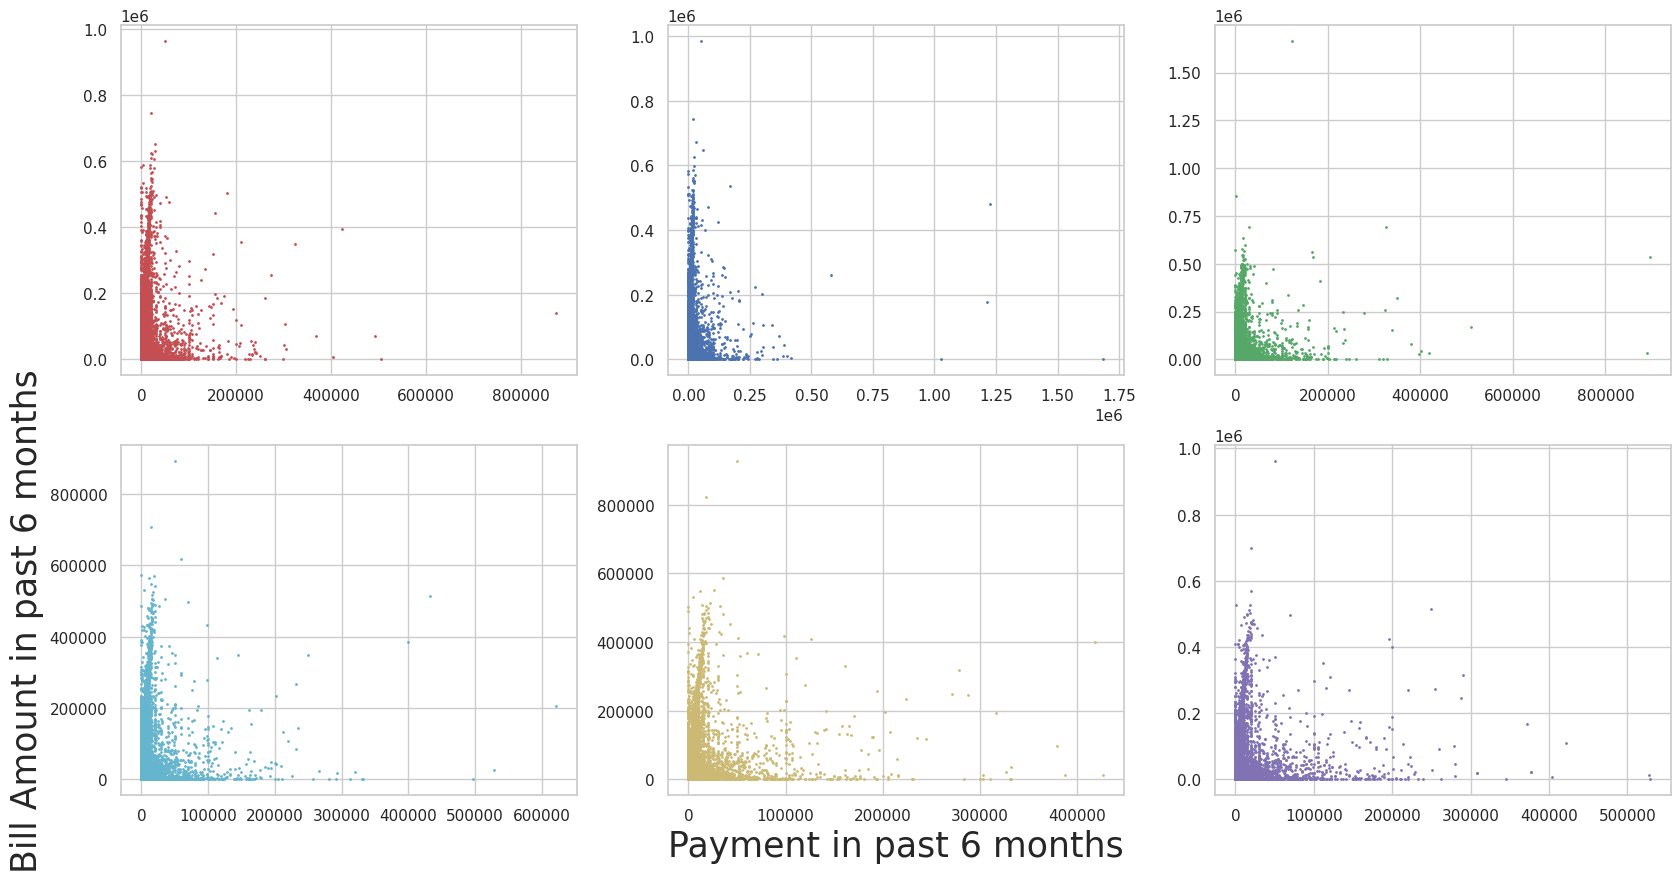

In [19]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=train_df.pay_amt1, y=train_df.Bill_amt1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=train_df.pay_amt2, y=train_df.Bill_amt2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=train_df.pay_amt3, y=train_df.Bill_amt3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=train_df.pay_amt4, y=train_df.Bill_amt4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=train_df.pay_amt5, y=train_df.Bill_amt5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=train_df.pay_amt6, y=train_df.Bill_amt6, c='m', s=1)

plt.show()

#  Low payment-to-bill ratios may reflect poor repayment capacity or behavior, making them key indicators of financial risk.